# <font color='black'>EE25737: Introduction to Machine Learning</font>
## Implementation of some algorithms by NumPy/SciPy

### [Ali Mehrabian]
### [96102331]

In this assignment, you will implement some important algorithms in Machine Learning only using Linalg and without using scikit-learn.


## 1.Perceptron



In this section, you will classify an binary dataset with perceptron algorithm.

###### Load data


Import data with pandas library.
First 9 columns are your training features. Name them 'X'. 10th column is label. Name it Y.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.lines as mlines

excel_file = 'classification_training.xlsx'
m = pd.read_excel(excel_file)



x =np.array(m.iloc[:,0:8]);
y=np.array(m.iloc[:,9]);


e = 'classification_validation.xlsx'
m2 = pd.read_excel(e)

x2 =np.array(m2.iloc[:,0:8]);
y2=np.array(m2.iloc[:,9]);

#x2, x = x, x2
#y2, y = y, y2







###### Initializing necessary variables


In this part initialize variables which you think are necessary.

In [2]:

import matplotlib.pyplot as plt


NR=np.size(x,axis=0);
NR2=np.size(x2,axis=0);
o=np.ones([NR,1]);
o2=np.ones([NR2,1]);

x11=np.concatenate((x,o), axis=1)
x22=np.concatenate((x2,o2), axis=1)


NC=np.size(x11,axis=1);

print(NR2)


299


##### Implement perceptron with batch mode gradient descent

In this section, you will implement perceptron alogirithm using all of the training data for updating the weights.
Stop updating when the number of misclassified data does not decrease.
In the end, for each learning-rate, plot the number of misclassified of training data and validation data versus number of iterations.

Text(0.5,1,'Test Dataset')

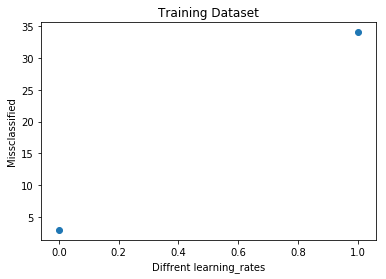

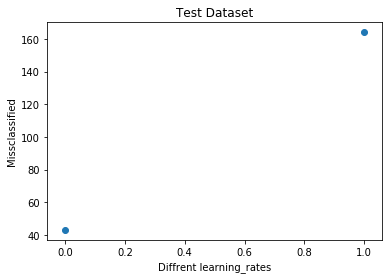

In [32]:
lr = [0.1,0.0000001]

mm2=50
misss=np.zeros([2])
mis=np.zeros([2])
w1=np.hstack(np.zeros([NC,1]))
ww=list();

for j in range(2):
    
    w1=np.hstack(np.random.randn(NC,1))
    
    for i in range(NR):
        
    
        
        prr=np.dot(x11,w1);
        for i in range(len(prr)):
            
            if(prr[i]>=0):
                prr[i]=1
            else:
                prr[i]=-1
        pr=np.dot(x11,w1);
        miss=np.size(np.where(y!=prr))
        q=np.dot(np.transpose(x11),y-prr);
        w1=w1+((lr[j])*(q))
    
        misss[j]=miss
    
        if miss<mm2:
            
            
        
            mm2=miss;
            
        else:
            
            misss[j]=mm2;
            ww.append(w1)
            mm2=50
            
            break;
            
            
plt.figure() 
plt.scatter(range(len(lr)),misss) 
plt.xlabel('Diffrent learning_rates')
plt.ylabel('Missclassified')
plt.title('Training Dataset')

for j in range(2):
    
    
    pr=np.sign(np.dot(x22,ww[j]))
    
    mis[j]=np.size(np.where(y2!=pr))
    
    
plt.figure()
plt.scatter(range(len(lr)),mis) 
plt.xlabel('Diffrent learning_rates')
plt.ylabel('Missclassified')
plt.title('Test Dataset')






##### Implement perceptron with online mode gradient descent

Do the same as the previous part.
Stopping rule isn't needed here. Just iterate once on training data.

Text(0.5,1,'Test Dataset')

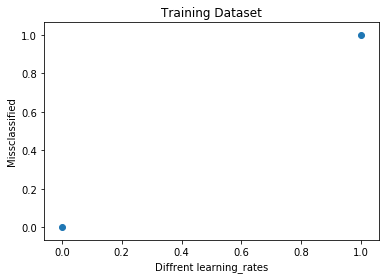

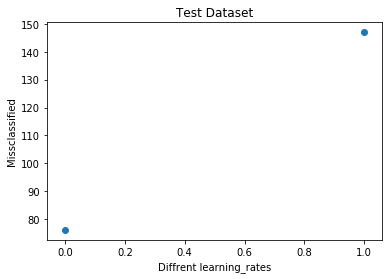

In [33]:
lr = [0.1,0.0000001]
misss=np.zeros([2])
mis=np.zeros([2])
w2=np.hstack(np.zeros([NC,1]))
ww=list();



for j in range(2):
    
    
    w2=np.hstack(np.random.randn(NC,1))


    for i in range(NR):
        
    
    
        prr2=np.sign(np.dot(x11[i,:],w2));
    
        #miss2=np.size(np.where(y[i]!=prr2))
    
    
        q2=np.dot(np.transpose(x11[i,:]),y[i]-prr2);
    
        w2=w2+((lr[j])*(q2))
    
    
    px1=np.sign(np.dot(x11,w2))
    ww.append(w2);
    misss[j]=np.size(np.where(y[i]!=prr2))


    
    
plt.scatter(range(len(lr)),misss) 
plt.xlabel('Diffrent learning_rates')
plt.ylabel('Missclassified')
plt.title('Training Dataset')


for j in range(2):
    
    
    pr=np.sign(np.dot(x22,ww[j]))
    
    mis[j]=np.size(np.where(y2!=pr))



plt.figure()
plt.scatter(range(len(lr)),mis) 
plt.xlabel('Diffrent learning_rates')
plt.ylabel('Missclassified')
plt.title('Test Dataset')







## 2. Logistic regression

Load Iris Dataset

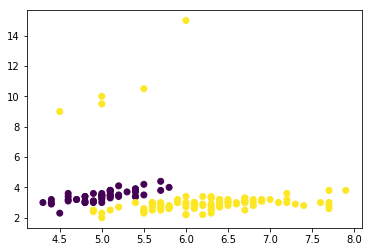

In [5]:
from numpy import genfromtxt
my_data = genfromtxt('Iris.csv', delimiter=',')
X=my_data[:,0:2]
y=my_data[:,2]

plt.scatter(X[:,0], X[:,1], c = y)
plt.show()







Implement the Logistic regression algorithm. You can change everything in the cell below.

In [6]:
class LogisticRegression:
    
    
    def __init__(self, lr, num_iter, fit_intercept, verbose): ## if fit_intercept==True you should increase the Input dimension by 1
        
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
        

        
        
    def fit (self,X,y) :
        
        
        NR=np.size(X,axis=0);
        o=np.ones([NR,1]);
        Xx=np.concatenate((X,o), axis=1)
        NC=np.size(Xx,axis=1);
        self.w=np.hstack(np.zeros([NC,1]))
        
        
        
        for i in range(self.num_iter):
            
            
            pr=1.0 / (1 + np.exp(np.dot(Xx,self.w)));
            
            
            self.w=self.w+((self.lr/NR)*(np.dot(np.transpose(Xx),pr-y)))
            
            
        return self.w
        
        
    
        
        
        
      
    def predict_prob (self,X) :
        
        NR=np.size(X,axis=0);
        o=np.ones([NR,1]);
        Xx=np.concatenate((X,o), axis=1)
        
        pr=1.0 / (1 + np.exp(np.dot(Xx,self.w)));
        
        return pr
        
        
        
      
      
    def predict (self,X,pr) :
        
        NR=np.size(X,axis=0);
        
        clf=np.hstack(np.zeros([NR,1]));
        
        k=np.where(pr>=0.5);
        
        clf[k]=1;
        
        return clf
        
        
        
        
      
    

Note that you should plot the dataset alongside the seprator line generated by Logistic regression and for different learning rates.

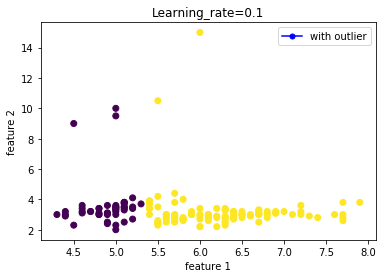

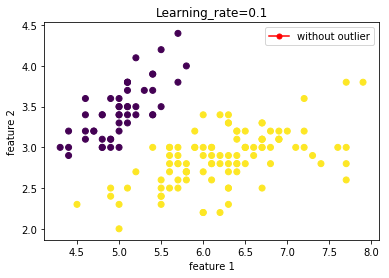

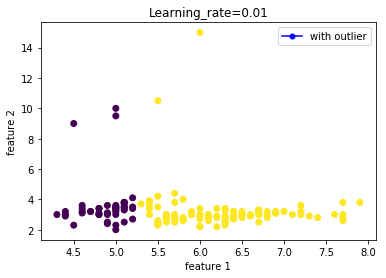

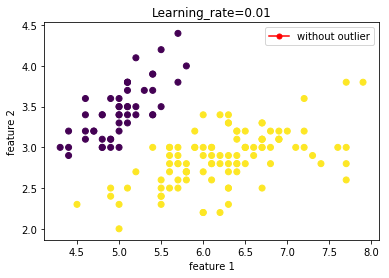

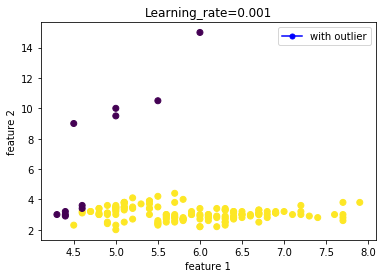

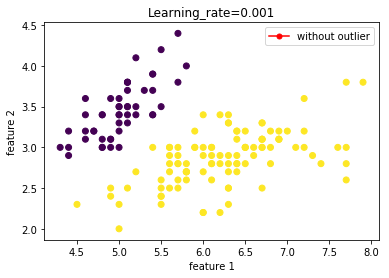

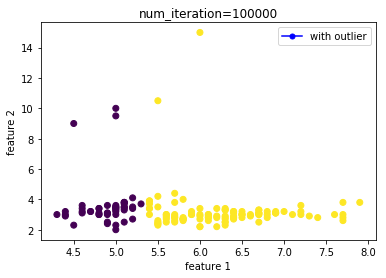

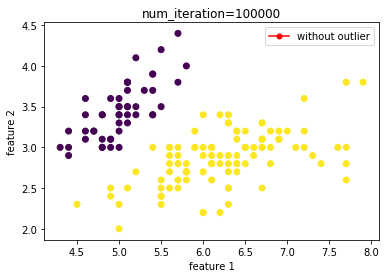

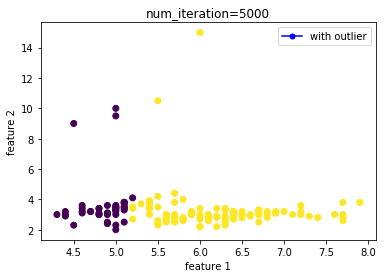

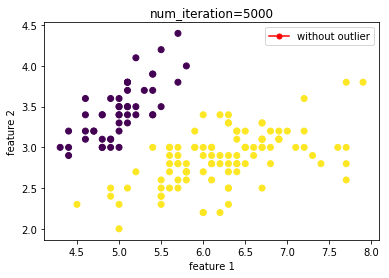

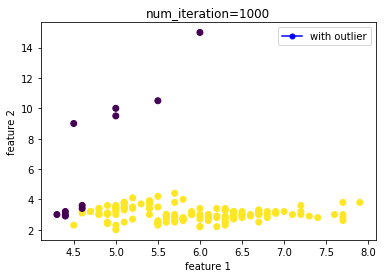

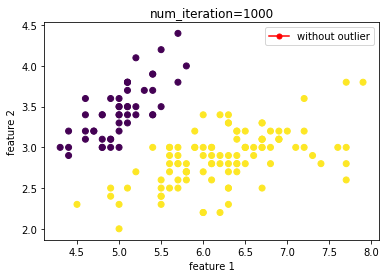

In [24]:
X_new = np.empty((1,2))
Y_new = []
X1_std = np.std(X[1,:])
X1_mean = np.mean(X[1,:])
for i in range(len(X)):
    if(abs(X[i,1]-X1_mean) <= 2.4*X1_std):
        X_new = np.append(X_new, np.reshape(X[i, :],(1,2)), axis= 0)
        Y_new = np.append(Y_new, [y[i]], axis= 0)
X_new = X_new[1:,:]

lr = np.logspace(-1, -3, num=3)
num_iters=[100000,5000,1000] 

for i in range(len(lr)):

    model = LogisticRegression(lr=lr[i], num_iter=100000, fit_intercept=True, verbose=False)

    ww=model.fit(X,y)
    a1=model.predict_prob(X);
    a2=model.predict(X,a1);
    
    
    
    
    
    
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=a2)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Learning_rate='+str(lr[i]))
    blue_line = mlines.Line2D([], [], color='blue', marker='o',markersize=5, label='with outlier')
    plt.legend(handles=[blue_line])
    
    
    
    
    
    
    



    ww=model.fit(X_new,Y_new)
    a11=model.predict_prob(X_new);
    a22=model.predict(X_new,a11);

    plt.figure()
    
    plt.scatter(X_new[:,0],X_new[:,1],c=a22)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('Learning_rate='+str(lr[i]))
    blue_line = mlines.Line2D([], [], color='red', marker='o',markersize=5, label='without outlier')
    plt.legend(handles=[blue_line])
    
    
    

for i in range(len(num_iters)):

    model = LogisticRegression(lr=0.1, num_iter=num_iters[i], fit_intercept=True, verbose=False)

    ww=model.fit(X,y)
    a1=model.predict_prob(X);
    a2=model.predict(X,a1);
    
    plt.figure()
    
    
    plt.scatter(X[:,0],X[:,1],c=a2)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('num_iteration='+str(num_iters[i]))
    blue_line = mlines.Line2D([], [], color='blue', marker='o',markersize=5, label='with outlier')
    plt.legend(handles=[blue_line])
    
    



    ww=model.fit(X_new,Y_new)
    a11=model.predict_prob(X_new);
    a22=model.predict(X_new,a11);

    plt.figure()
   
    plt.scatter(X_new[:,0],X_new[:,1],c=a22)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('num_iteration='+str(num_iters[i]))
    blue_line = mlines.Line2D([], [], color='red', marker='o',markersize=5, label='without outlier')
    plt.legend(handles=[blue_line])
    


## 3. Linear regression

In this part, you should impelement linear regression on Boston Housing dataset.

In [26]:
## do not edit this cell ##

### Load Dataset ###
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X=boston_dataset.data
Y=boston_dataset.target


Impelement Linear regression algorithm. You can change all the parts in the cell below.

---



In [27]:
class LinearRegression:
    def __init__(self, lr, num_iter, fit_intercept, verbose): ## if fit_intercept==True you should increase the Input dimension by 1
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def fit (self,X,y) :
        
        NR=np.size(X,axis=0);
        o=np.ones([NR,1]);
        Xx=np.concatenate((X,o), axis=1)
        NC=np.size(Xx,axis=1);
        
        
        
        Xx = (Xx - np.mean(Xx)) / np.std(Xx)
        
      
        self.w=np.hstack(np.ones([NC,1]))
        
        
        j=[];
        
        for i in range(self.num_iter):
            
            
            
            yy= np.dot(Xx, self.w)
            
            self.w=self.w+((self.lr/NR)*(np.dot(np.transpose(Xx),y-yy)))
            
            j.append((np.sum(np.square(y-yy)))/NR)
            
        
        return self.w,j
      
    def predict (self,X) :
        
        NR=np.size(X,axis=0);
        o=np.ones([NR,1]);
        Xx=np.concatenate((X,o), axis=1)
        
        
       
        Xx = (Xx - np.mean(Xx)) / np.std(Xx)
    
        
        a=np.dot(Xx,self.w);
        
        return a
      
      

Split the dataset into the train and test part (with the proportion of 80/20), and fit the model on train data.

In [28]:
model = LinearRegression(lr=0.1, num_iter=100000, fit_intercept=True, verbose=False)

num_iter=100000;
NR=np.size(X,axis=0);
NC=np.size(X,axis=1);
        
TestRatio = 0.2
TestIdx = np.random.rand(NR) < TestRatio
TrainIdx = ~TestIdx
yt=Y[TrainIdx]
ytest=Y[TestIdx];
test=X[TestIdx]
train=X[TrainIdx]



w,j=model.fit(train,yt)



Plot the loss function versus iterations for both the train and test data and for different learning rates.

Text(0.5,1,'validation_dataset loss')

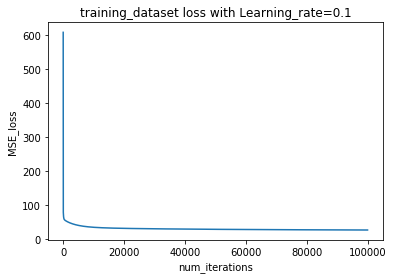

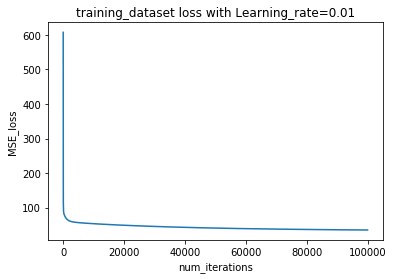

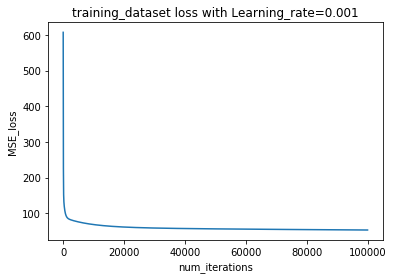

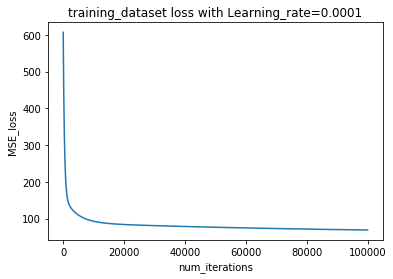

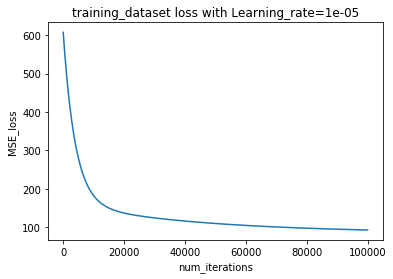

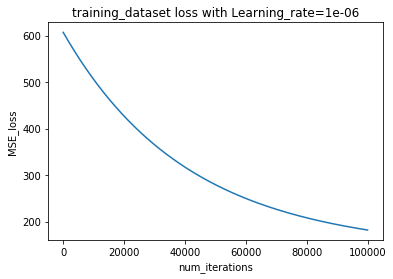

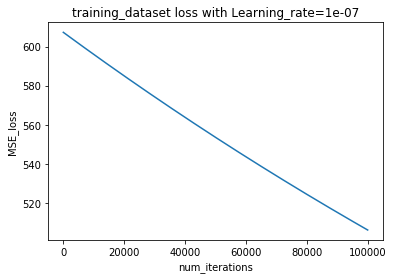

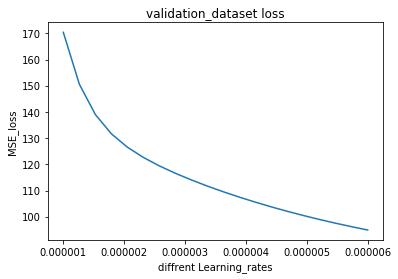

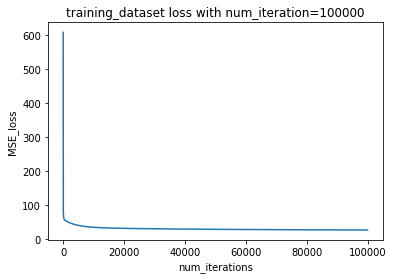

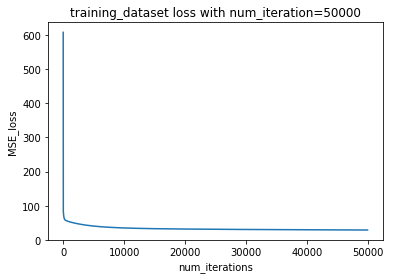

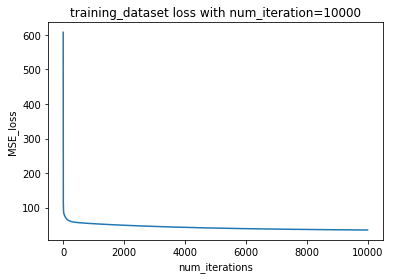

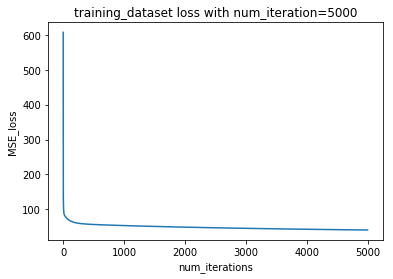

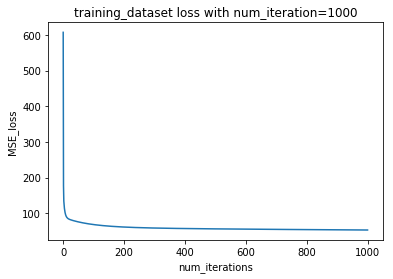

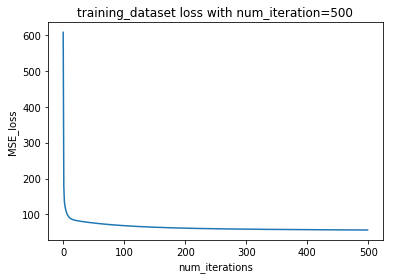

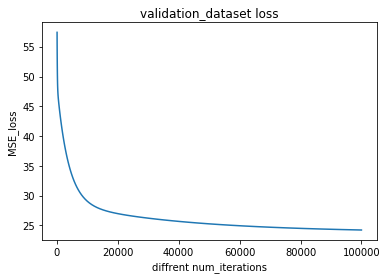

In [49]:


o=model.predict(test)




lr = np.logspace(-1, -7, num=7)
num_iters=[100000,50000,10000,5000,1000,500] 



for i in range(len(lr)):
    model = LinearRegression(lr=lr[i], num_iter=100000, fit_intercept=True, verbose=False)
    w,j=model.fit(train,yt)
    o=model.predict(test)
    
    plt.figure()
    plt.plot(range(100000),j)
    plt.xlabel('num_iterations')
    plt.ylabel('MSE_loss')
    plt.title('training_dataset loss with Learning_rate='+str(lr[i]))
    

lr= np.linspace(0.000001, 0.000006, 20)
ll=np.zeros([len(lr),1])

for i in range(len(lr)):
    model = LinearRegression(lr=lr[i], num_iter=100000, fit_intercept=True, verbose=False)
    w,j=model.fit(train,yt)
    o=model.predict(test)
    ll[i]=(np.square(ytest - o)).mean(axis=0)
  
    
    
plt.figure()    
plt.plot(lr,ll)
plt.xlabel('diffrent Learning_rates')
plt.ylabel('MSE_loss')
plt.title('validation_dataset loss')
    
    
    


for i in range(len(num_iters)):
    model = LinearRegression(lr=0.1, num_iter=num_iters[i], fit_intercept=True, verbose=False)
    w,j=model.fit(train,yt)
    o=model.predict(test)
    plt.figure()
    plt.plot(range(num_iters[i]),j)
    plt.xlabel('num_iterations')
    plt.ylabel('MSE_loss')
    plt.title('training_dataset loss with num_iteration='+str(num_iters[i]))
    
num_iter = np.logspace(2,5,100).astype(int)
ll=np.zeros([len(num_iter),1])

for i in range(len(num_iter)):
    model = LinearRegression(lr=0.1, num_iter=num_iter[i], fit_intercept=True, verbose=False)
    w,j=model.fit(train,yt)
    o=model.predict(test)
    ll[i]=(np.square(ytest - o)).mean(axis=0)
  
    
    
plt.figure()    
plt.plot(num_iter,ll)
plt.xlabel('diffrent num_iterations')
plt.ylabel('MSE_loss')
plt.title('validation_dataset loss')    